# Week 2: Least Squares Fitting (cont.)

## Goals
- Plotting data in Python via [matplotlib](https://matplotlib.org/)
- Higher dimensional least squares fitting in Python

## Plotting with Matplotlib
The module [matplotlib](https://matplotlib.org/) is very powerful and customizable. 

We will plot the data points (ignoring the $i$ column) from the in-class exercise from Week 1.

In [1]:
import pandas as pd 

df = pd.DataFrame({
    "x" : [1.0, 2.0, 3.0, 1.5, 3.5, 3.0, 4.0, 5.0],
    "y" : [1.0, 1.5, 2.0, 2.0, 3.0, 4.5, 2.0, 3.5]
})
print(df)

     x    y
0  1.0  1.0
1  2.0  1.5
2  3.0  2.0
3  1.5  2.0
4  3.5  3.0
5  3.0  4.5
6  4.0  2.0
7  5.0  3.5


Pandas already incorporates matplotlib in its `plot` method for a data frame, but it's not what we want.

<Axes: >

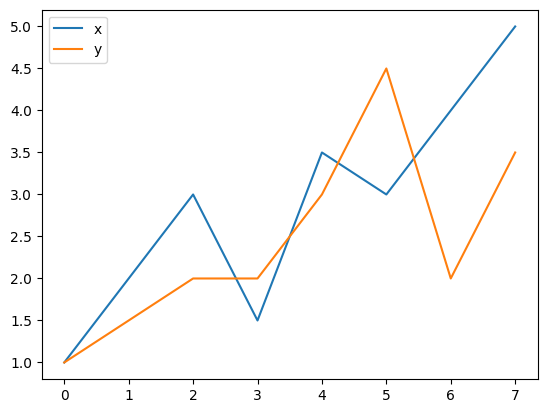

In [2]:
df.plot()           # Using matplotlib in the backend

We will build a scatter plot from scratch.

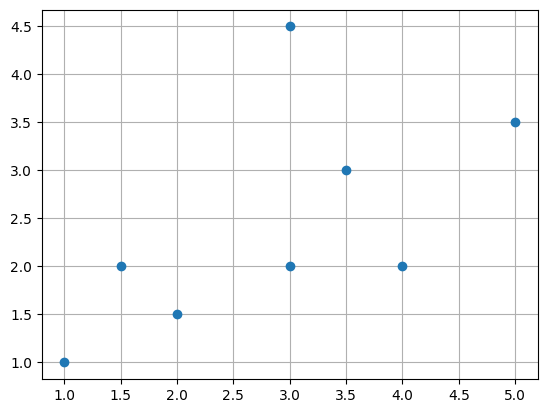

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.grid()                                   # Turns the grids on
ax.scatter(df["x"], df["y"], zorder=2)      # Builds a scatter plot 
plt.show()                                  # Displays the plot

### Least Squares Fitting

Now let's put a least squares line in the plot. 

First we need to compute the least squares line.

Recall 
$$
\begin{aligned}
    X &= \begin{pmatrix} 
        1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n
    \end{pmatrix}, & 
    Y &= \begin{pmatrix} 
        y_1 \\ y_2 \\ \vdots \\ y_n
    \end{pmatrix} , & 
    B &= \begin{pmatrix}
        b_0 \\ b_1
    \end{pmatrix} ,
\end{aligned} 
$$
where $B = (X^{\mathrm{t}}X)^{-1} X^{\mathrm{t}}Y$, provided $X^{\mathrm{t}}X$ is invertible.

We will use the `numpy` matrix data structures.

In [4]:
import numpy as np

X = np.array([[1]*len(df), df["x"]]).T      # The method T is the transpose
print(X)
Y = np.array([df["y"]]).T 
print(Y)

[[1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  1.5]
 [1.  3.5]
 [1.  3. ]
 [1.  4. ]
 [1.  5. ]]
[[1. ]
 [1.5]
 [2. ]
 [2. ]
 [3. ]
 [4.5]
 [2. ]
 [3.5]]


Now we compute $B = (X^{\mathrm{t}}X)^{-1} X^{\mathrm{t}}Y$:

In [5]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
b0 = B[0,0]                                     # The (0,0) entry of B
b1 = B[1,0]                                     # The (1,0) entry of B
print("b0 = {0}\nb1 = {1}".format(b0, b1))      # Fancy printing

b0 = 0.9419191919191912
b1 = 0.5202020202020203


### Plotting the scatter plot and the line

Now we need to include the line $y=b_0+b_1x$ into our plot above. 

We just simply create both a scatter and a plot, and then we display the resulting plot.

Matplotlib simply connects points

In [6]:
X = np.linspace(0.9, 5.1, 2)
Y = b0 + b1*X
print("X = {0}\nY = {1}".format(X, Y))

X = [0.9 5.1]
Y = [1.41010101 3.59494949]


We can actually make the pandas plot work 😁

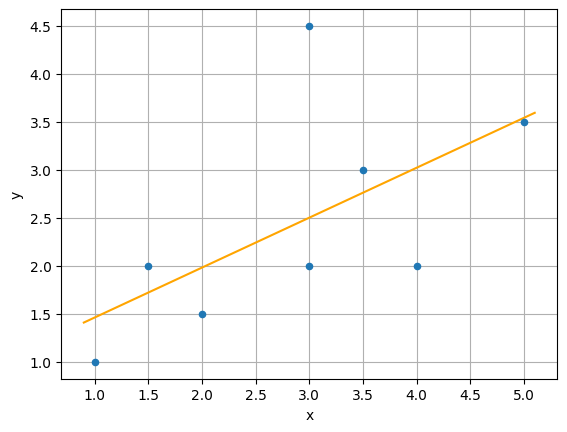

In [7]:
fig, ax = plt.subplots()
df.plot(kind="scatter", x="x", y="y", ax=ax, zorder=3)
ax.plot(X, Y, c="orange", zorder=2)
ax.grid()
ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

## Plane of best fit
Just as before, we can load our data from `./data/ex2.csv` using pandas.

In [8]:
df = pd.read_csv("data/ex2.csv")
print(df)

    x_i1  x_i2  y_i
0    278    36  287
1    252    31  256
2    344    35  300
3    134    33  182
4    215    35  248
5    261    40  271
6    131    39  149
7    463    43  411
8    167    46  214
9    298    42  291
10   230    60  314
11   293    67  352
12   290    37  298
13   271    31  252
14   385    63  439
15   354    36  328


To get the plane of best fit, we construct the relevant matrices and solve:
$$
\begin{aligned} 
    X &= \begin{pmatrix} 
        1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n2}
    \end{pmatrix}, & 
    Y &= \begin{pmatrix} 
        y_1 \\ y_2 \\ \vdots \\ y_n
    \end{pmatrix} , & 
    B &= \begin{pmatrix}
        b_0 \\ b_1 \\ b_2
    \end{pmatrix} .
\end{aligned}
$$

We will build $X$ by concatenating three columns:

In [9]:
ones = np.array([[1] * 16]).T
xi1 = np.array([df["x_i1"]]).T
xi2 = np.array([df["x_i2"]]).T
X = np.concatenate((ones, xi1, xi2), axis=1)
print(X)

[[  1 278  36]
 [  1 252  31]
 [  1 344  35]
 [  1 134  33]
 [  1 215  35]
 [  1 261  40]
 [  1 131  39]
 [  1 463  43]
 [  1 167  46]
 [  1 298  42]
 [  1 230  60]
 [  1 293  67]
 [  1 290  37]
 [  1 271  31]
 [  1 385  63]
 [  1 354  36]]


In [10]:
Y = np.array([df["y_i"]]).T
print(Y)

[[287]
 [256]
 [300]
 [182]
 [248]
 [271]
 [149]
 [411]
 [214]
 [291]
 [314]
 [352]
 [298]
 [252]
 [439]
 [328]]


In [11]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(B)

[[-11.32550522]
 [  0.69764697]
 [  2.56273209]]


Therefore, our plane of best fit is approximately 
$$
    y = -11.3 + 0.7x_1 + 2.6x_2. 
$$

## Plotting a 3D scatter with a plane

First we plot the data points in $\mathbb{R}^3$. [Matplotlib documentation](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) for reference.

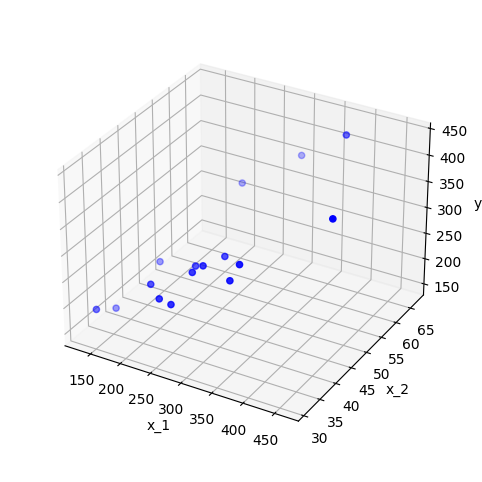

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["x_i1"], df["x_i2"], df["y_i"], c="blue")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_zlabel("y")
ax.set_box_aspect(aspect=None, zoom=0.9)

Now we put a plot of our plane of best fit onto the same axes.